In [1]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('/content/train.csv')

# 1. Зниження розмірності і візуалізація даних

In [7]:
df

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322         -0.998807   
2            -0.995380         -0.967187         -0.978944         -0.996520   
3            -0.996091         -0.983403         -0.990675         -0.997099   
4            -0.998139         -0.980817         -0.990482         -0.998321   
...                ...               ...               ...               ...   
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0            -0.983185         -0.923527         -0.934724  ...   
1            -0.974914         -0.957686         -0.943068  ...   
2            -0.963668         -0.977469         -0.938692  ...   
3            -0.982750         -0.989302         -0.938692  ...   
4            -0.979672         -0.990441         -0.942469  ...   
...                ...               ...               ...  ...   
7347          0.043616          0.060410          0.210795  ...   
7348         -0.029456          0.080585          0.117440  ...   
7349         -0.098913          0.332584          0.043999  ...   
7350         -0.068200          0.319473          0.101702  ...   
7351         -0.038678          0.229430          0.269013  ...   

      fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                           -0.710304                    -0.112754   
1                           -0.861499                     0.053477   
2                           -0.760104                    -0.118559   
3                           -0.482845                    -0.036788   
4                           -0.699205                     0.123320   
...                               ...                          ...   
7347                        -0.880324                    -0.190437   
7348                        -0.680744                     0.064907   
7349                        -0.304029                     0.052806   
7350                        -0.344314                    -0.101360   
7351                        -0.740738                    -0.280088   

      angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                 0.030400                         -0.464761   
1                                -0.007435                         -0.732626   
2                                 0.177899                          0.100699   
3                                -0.012892                          0.640011   
4                                 0.122542                          0.693578   
...                                    ...                               ...   
7347                              0.829718                

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_std = scaler.fit_transform(df.dropna().iloc[:,:-1])

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.dropna()['Activity'])
y=le.transform(df.dropna()['Activity'])

In [36]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X_std, y)
print(X_selected.shape)

(7352, 10)


In [37]:
selected_feature_names = df.iloc[:,:-1].columns[fs.get_support()]

In [38]:
selected_feature_names

Index(['tGravityAcc-mean()-X', 'tGravityAcc-max()-X', 'tGravityAcc-min()-X',
       'tGravityAcc-energy()-X', 'tBodyAccJerk-entropy()-X',
       'tBodyAccJerkMag-entropy()', 'fBodyAcc-entropy()-X',
       'fBodyAccJerk-entropy()-X', 'fBodyAccJerk-entropy()-Y',
       'fBodyBodyAccJerkMag-entropy()'],
      dtype='object')

In [40]:
new_df=df[selected_feature_names]

In [41]:
pca=PCA(n_components=2)
pca.fit(new_df)
df_pca=pca.transform(new_df)

In [12]:
import matplotlib.pyplot as plt

In [62]:
test=pd.DataFrame(data=df_pca)

In [64]:
test['label']=df.dropna()['Activity']

In [65]:
test

0         1             label
0    -1.402431 -1.286171          STANDING
1    -1.421632 -1.306583          STANDING
2    -1.369166 -1.287022          STANDING
3    -1.390602 -1.298473          STANDING
4    -1.422930 -1.312590          STANDING
...        ...       ...               ...
7347  1.882883  0.127582  WALKING_UPSTAIRS
7348  1.772344  0.097374  WALKING_UPSTAIRS
7349  1.790958  0.099564  WALKING_UPSTAIRS
7350  1.673868  0.044876  WALKING_UPSTAIRS
7351  1.793543  0.110101  WALKING_UPSTAIRS

[7352 rows x 3 columns]

In [17]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

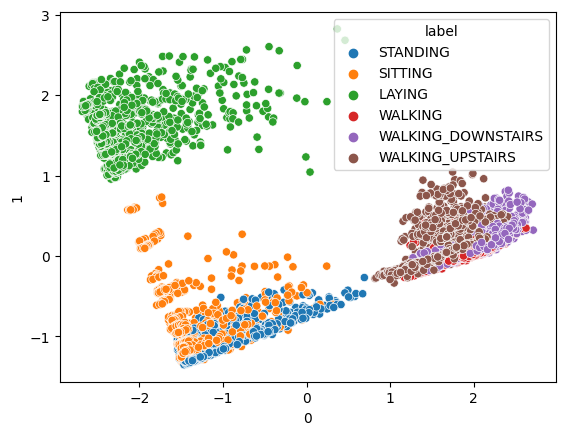

In [66]:
sns.scatterplot(data=test,x=0,y=1,hue='label')

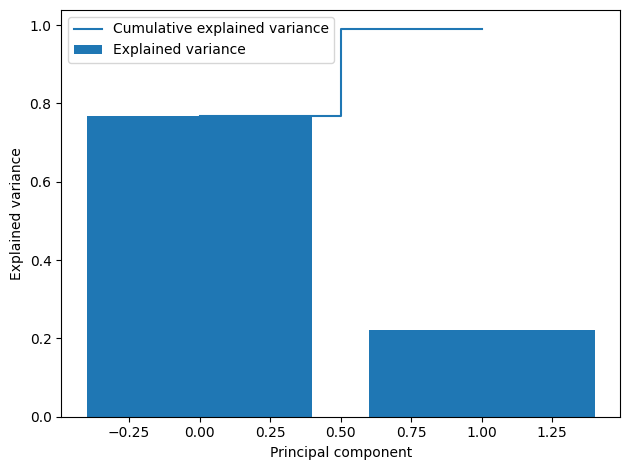

In [67]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [130]:
exp_var_pca.sum()

0.9889552949686302

In [131]:
from sklearn.manifold import TSNE

In [133]:
tsne=TSNE(n_components=2)
df_tsne=tsne.fit_transform(new_df)

In [134]:
test_tsne=pd.DataFrame(data=df_tsne)

In [135]:
test_tsne['label']=df.dropna()['Activity']

<Axes: xlabel='0', ylabel='1'>

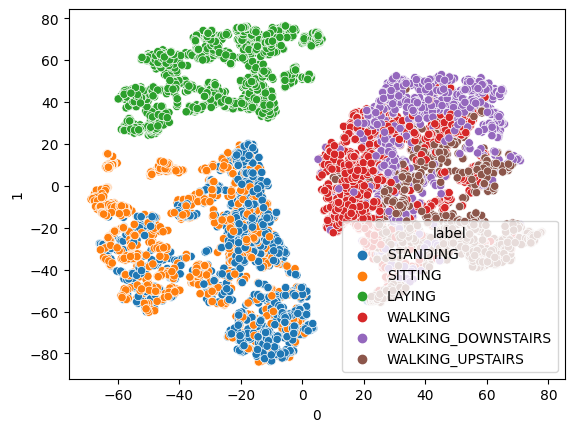

In [136]:
sns.scatterplot(data=test_tsne,x=0,y=1,hue='label')

# 2. Кластерний аналіз

In [95]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

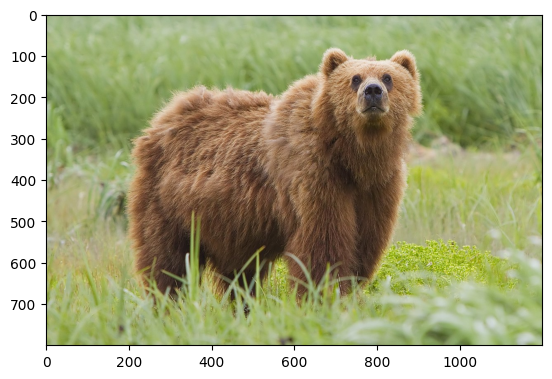

In [96]:
import cv2

image = cv2.imread('/content/2010-kodiak-bear-1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [97]:
image = np.array(image, dtype=np.float64) / 255

In [98]:
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

In [99]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

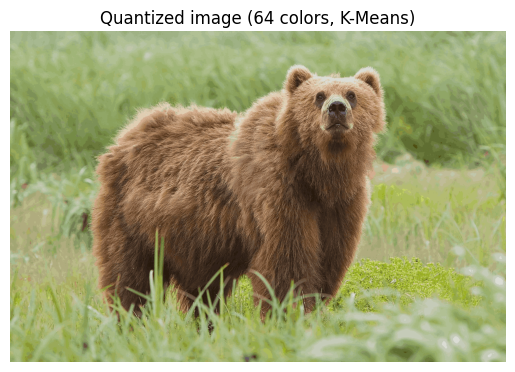

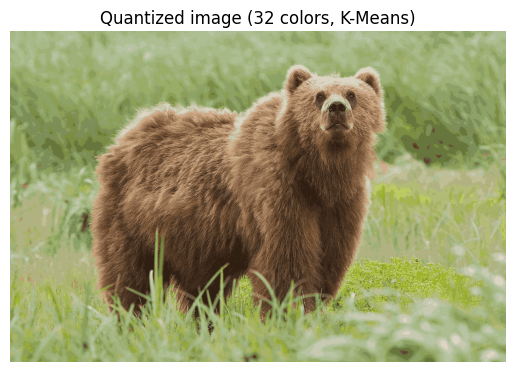

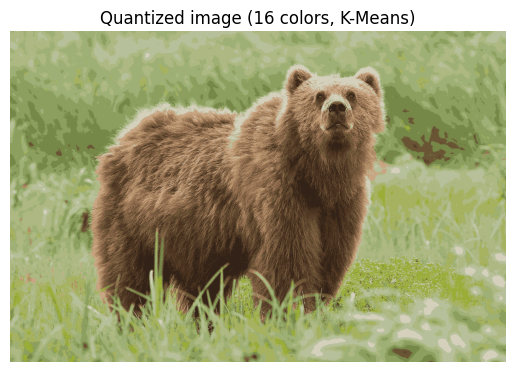

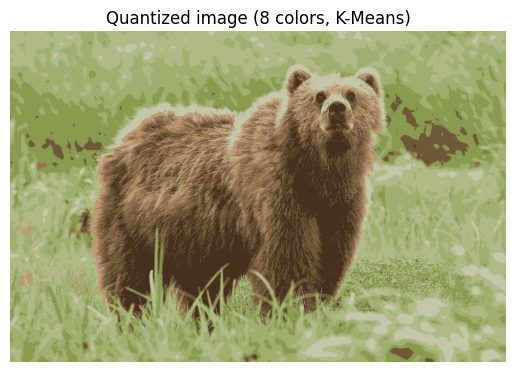

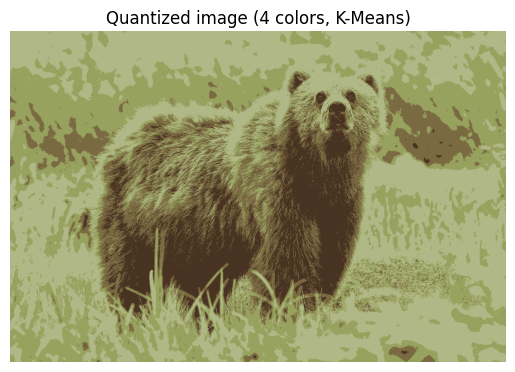

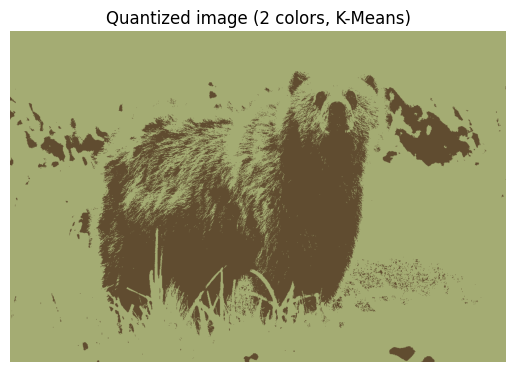

In [100]:
for n_colors in [64,32,16,8,4,2]:
  image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
  kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
      image_array_sample)
  labels = kmeans.predict(image_array)
  codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
  labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

  plt.clf()
  plt.axis("off")
  plt.title(f"Quantized image ({n_colors} colors, K-Means)")
  plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
  plt.show()

# 3. Обробка та класифікація текстових даних

In [101]:
train=pd.read_csv('/content/Poem_classification - train_data.csv')
train

Genre                                               Poem
0          Music                                                NaN
1          Music                In the thick brushthey spend the...
2          Music     Storms are generous.                       ...
3          Music   —After Ana Mendieta Did you carry around the ...
4          Music   for Aja Sherrard at 20The portent may itself ...
..           ...                                                ...
836  Environment  Why make so much of fragmentary blue In here a...
837  Environment  Woman, I wish I didn't know your name. What co...
838  Environment  Yonder to the kiosk, beside the creek, Paddle ...
839  Environment  You come to fetch me from my work to-night Whe...
840  Environment  You see them through water and glass, (both li...

[841 rows x 2 columns]

In [102]:
train=train.dropna()

In [103]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def extract_all_words(text_collection):
    all_words = ''.join([text for text in text_collection])
    return all_words

def generate_word_cloud(text_collection):
    all_words = extract_all_words(text_collection)
    word_cloud = WordCloud(
        width = 800,
        height = 600,
        max_font_size = 110,
        collocations = False
    ).generate(all_words)
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

In [109]:
import seaborn as sns
import nltk
from nltk import tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [107]:
def remove_stopwords_and_punctuations(dataset, text_column_name, stopwords, punctuations, other):
    tokenizer = tokenize.WordPunctTokenizer()
    treated_column = []
    for text in dataset[text_column_name]:
        text_items = []
        tokenized_data = tokenizer.tokenize(text)
        for token in tokenized_data:
            lower_token = token.lower()
            if lower_token not in stopwords + punctuations + other:
                text_items.append(lower_token)
        treated_text = ' '.join(text_items)
        treated_column.append(treated_text)
    dataset['treated_data'] = treated_column

In [111]:
def token_frequency_graphic(text_collection, n_largest):
    all_words = extract_all_words(text_collection)
    tokenizer = tokenize.WordPunctTokenizer()
    tokenized_data = tokenizer.tokenize(all_words)
    frequency = nltk.FreqDist(tokenized_data)
    frequency_df = pd.DataFrame({
        'word': list(frequency.keys()),
        'frequency': list(frequency.values())
    })
    plt.figure(figsize=(12,6))
    ax = sns.barplot(
        data = frequency_df.nlargest(n_largest, 'frequency'),
        x = 'word',
        y = 'frequency'
    )
    ax.set(ylabel = 'word count')
    plt.show()

In [110]:
from string import punctuation

punctuations = [punct for punct in punctuation]
stopwords = nltk.corpus.stopwords.words("english")
other = ['s', '—', '?!', ',', '’']

remove_stopwords_and_punctuations(train, 'Poem', stopwords, punctuations, other)
train.head(10)

<ipython-input-107-95d92185846f>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Genre                                               Poem  \
1   Music                In the thick brushthey spend the...   
2   Music     Storms are generous.                       ...   
3   Music   —After Ana Mendieta Did you carry around the ...   
4   Music   for Aja Sherrard at 20The portent may itself ...   
5   Music   for Bob Marley, Bavaria, November 1980 Here i...   
6   Music   For Frank X WalkerFXW: I don’t know how to sw...   
7   Music   My neighbor to the left had a stroke a couple...   
8   Music  —for a sixty-seven-pound nugget of Lake Superi...   
9   Music  —Issa Rae Everybody Black is my hometown team....   
10  Music  "Save your hands,” my mother says, seeing me u...   

                                         treated_data  
1   thick brushthey spend hottest part day soaking...  
2   storms generous something easy surrender sitti...  
3   ana mendieta carry around matin star hold fore...  
4   aja sherrard 20the portent may memory wallace ...  
5   bob marley bavaria november 1980 brilliant mor...  
6   frank x walkerfxw know swim fxw pools black fo...  
7   neighbor left stroke couple years ago look lik...  
8   sixty seven pound nugget lake superior copperf...  
9   issa rae everybody black hometown team everybo...  
10  save hands ,” mother says seeing untwist jar t...

In [112]:
train['Genre'].unique()

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

Music


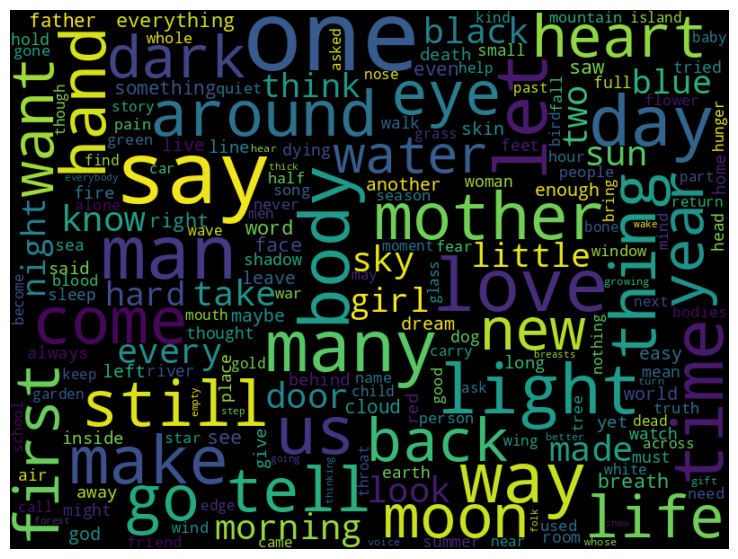

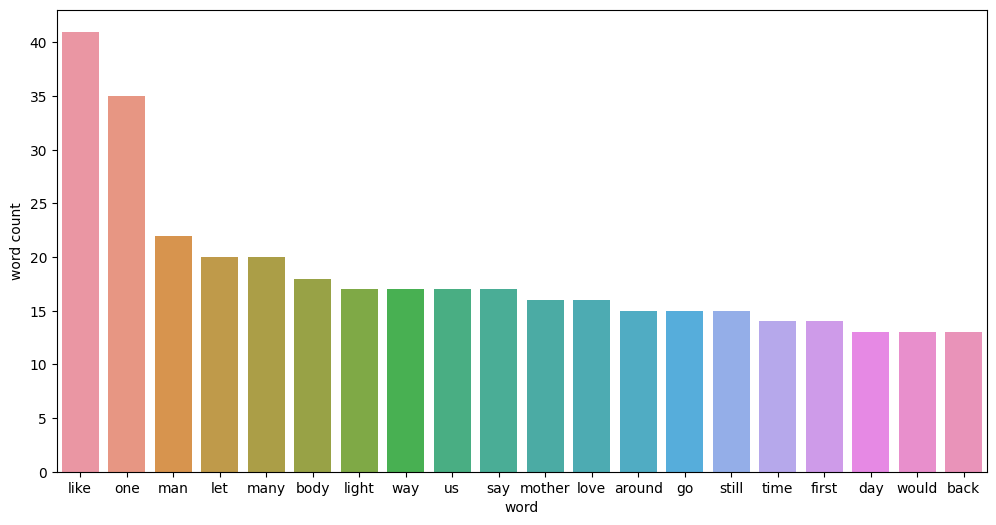

Death


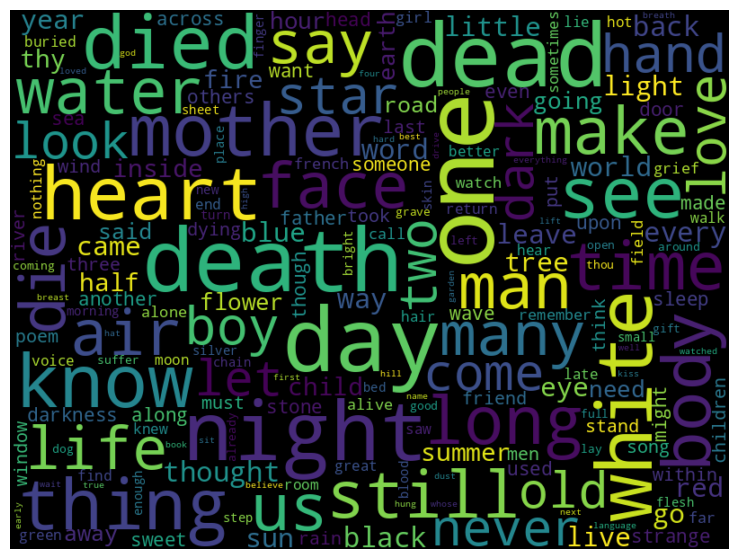

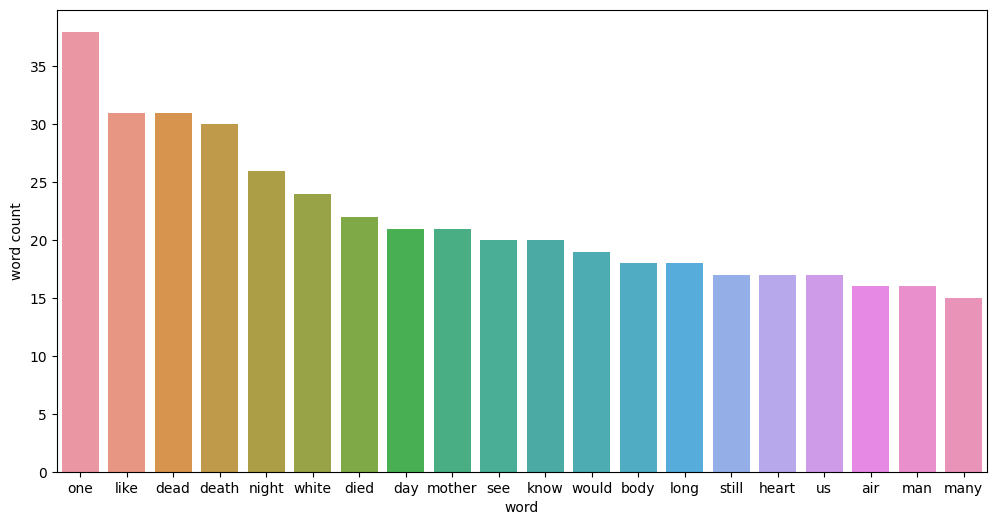

Affection


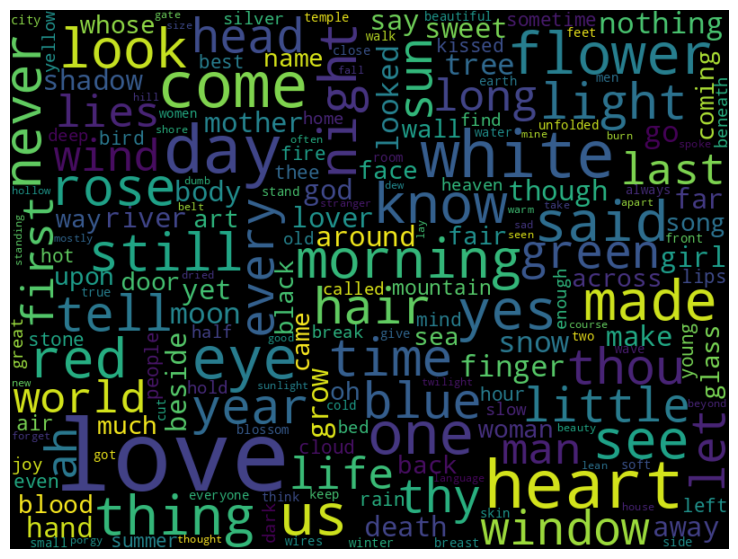

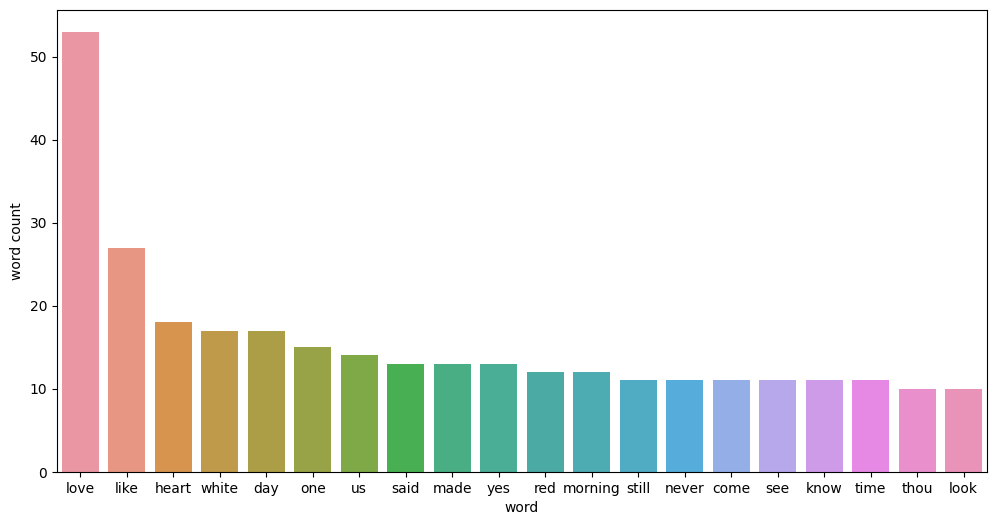

Environment


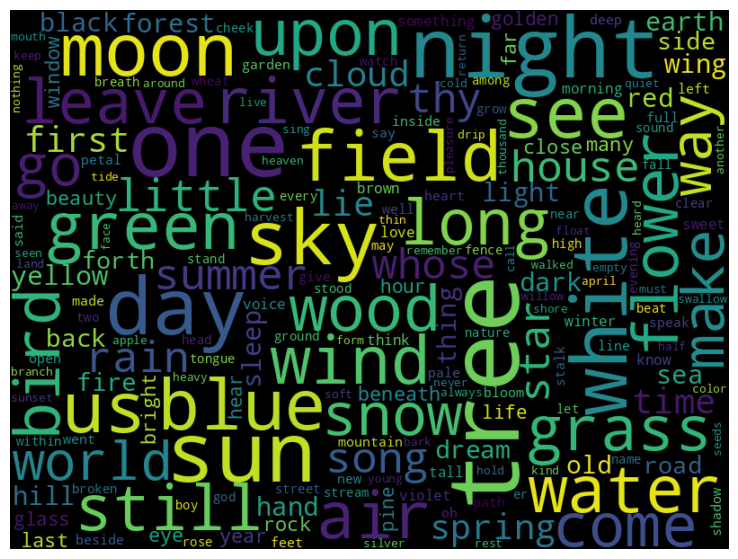

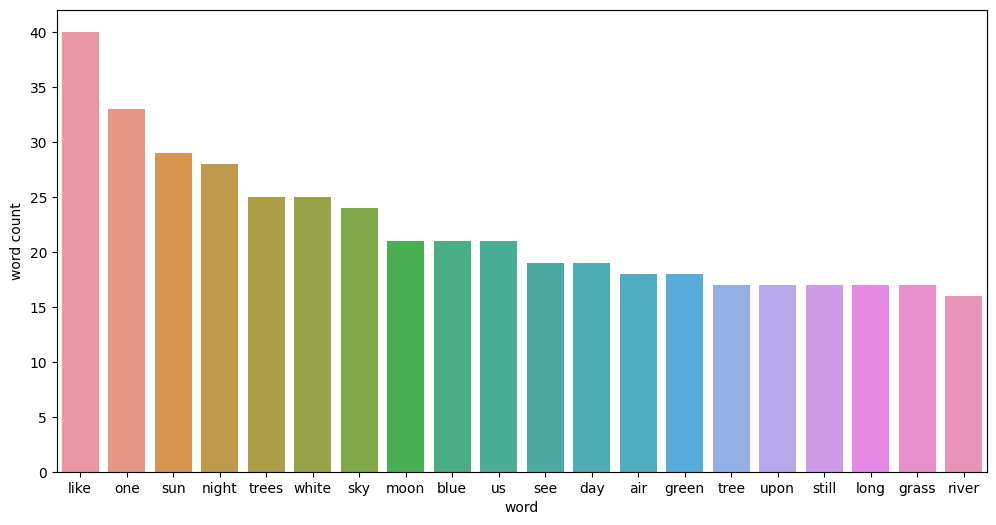

In [117]:
for label in train['Genre'].unique():
  print(label)
  generate_word_cloud(train[train['Genre']==label]["treated_data"])
  token_frequency_graphic(train[train['Genre']==label]["treated_data"], 20)

In [118]:
def stemmizer(dataset, text_column):
    stemmer = nltk.stem.PorterStemmer()
    tokenizer = tokenize.WordPunctTokenizer()
    treated_column = []
    for text in dataset[text_column]:
        tokenized_data = tokenizer.tokenize(text)
        text_items = []
        for token in tokenized_data:
            text_items.append(stemmer.stem(token))
        treated_text = ' '.join(text_items)
        treated_column.append(treated_text)
    dataset['stemmed_data'] = treated_column

In [119]:
stemmizer(train, 'treated_data')

<ipython-input-118-efb0eca91f39>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 20)
tfid = vectorizer.fit_transform(train['stemmed_data'])
tfid.shape

(837, 20)

In [128]:
X = tfid
y = train['Genre']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [126]:
from sklearn.metrics import classification_report

predict = lr.predict(X_test)
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

   Affection       0.28      0.19      0.23        42
       Death       0.30      0.24      0.27        78
 Environment       0.36      0.23      0.28        75
       Music       0.36      0.60      0.45        82

    accuracy                           0.34       277
   macro avg       0.32      0.31      0.30       277
weighted avg       0.33      0.34      0.32       277

